In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


In [79]:
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

# Load data set

In [3]:
df = pd.read_excel("C:/Users/PCC/Downloads/Assignment Internship (1).xlsx")

In [4]:
df

,Unnamed: 0,project,location,bhk,total_floors,carpet area,super area,price,rate,Linear Regression,Random Forest,Decision Tree,Gradient Boosting
0,0,Casa Imperia,Wakad,2,10,0.0,970,6800000,7010.309278,5912.142153,6637.060435,6569.112132,4499.264877
1,1,5 Star Royal Entrada,Wakad,2,12,800.0,0,6500000,8125.000000,6062.893599,6587.658950,6569.112132,4123.087637
2,2,The Royal Mirage,Wakad,2,12,730.0,0,6199890,8493.000000,5792.511819,6625.170206,6569.112132,4870.961077
3,3,Legacy Bliss,Wakad,2,10,0.0,934,6614588,7082.000000,5828.227561,6637.060435,6569.112132,4358.187396
4,4,premium project,Wakad,2,12,0.0,985,4499480,4568.000000,5755.906660,6707.263053,6569.112132,4509.720852
5,5,Yashada Splendid Radiance,Wakad,2,11,646.0,0,5724206,8861.000000,5698.607643,6631.956212,6569.112132,4787.693115
6,6,Opus 77,Wakad,3,6,0.0,1343,9999978,7446.000000,6271.984600,6933.508385,6536.852737,4811.872661
7,7,Casa Imperia,Wakad,2,12,0.0,950,7500000,7894.736842,5996.520128,6637.060435,6569.112132,4209.104252
8,8,Rohan Prathama,Hinjewadi,2,11,620.0,0,5551480,8954.000000,6063.568673,5722.917749,5618.492443,4264.542797
9,9,Krishna Amarillo,Hinjewadi,2,14,706.0,0,5300000,7507.082153,6298.028585,5722.917749,5618.492443,3913.915977


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17 non-null     int64  
 1   project            17 non-null     object 
 2   location           17 non-null     object 
 3   bhk                17 non-null     int64  
 4   total_floors       17 non-null     int64  
 5   carpet area        17 non-null     float64
 6   super area         17 non-null     int64  
 7   price              17 non-null     int64  
 8   rate               17 non-null     float64
 9   Linear Regression  17 non-null     float64
 10  Random Forest      17 non-null     float64
 11  Decision Tree      17 non-null     float64
 12  Gradient Boosting  17 non-null     float64
dtypes: float64(6), int64(5), object(2)
memory usage: 1.9+ KB


In [7]:
df.shape

(17, 13)

In [8]:
df['project'].unique()


array(['Casa Imperia', '5 Star Royal Entrada', 'The Royal Mirage',
       'Legacy Bliss', 'premium project', 'Yashada Splendid Radiance',
       'Opus 77', 'Rohan Prathama', 'Krishna Amarillo', 'Siddhi Nisarg',
       'Saarrthi Savvy Homes', '5 Star Royal Grande', 'Premium Project',
       'Sr.Swati'], dtype=object)

In [9]:
df.groupby('project')['project'].agg('count')


project
5 Star Royal Entrada         1
5 Star Royal Grande          1
Casa Imperia                 2
Krishna Amarillo             1
Legacy Bliss                 1
Opus 77                      1
Premium Project              1
Rohan Prathama               1
Saarrthi Savvy Homes         1
Siddhi Nisarg                3
Sr.Swati                     1
The Royal Mirage             1
Yashada Splendid Radiance    1
premium project              1
Name: project, dtype: int64

In [10]:
df.columns

Index(['Unnamed: 0', 'project', 'location', 'bhk', 'total_floors',
       'carpet area', 'super area', 'price', 'rate ', 'Linear Regression',
       'Random Forest', 'Decision Tree', 'Gradient Boosting'],
      dtype='object')

# Drop column that are not required to build our model

In [11]:
df1 = df.drop(['Unnamed: 0'],axis=1)


In [13]:
df1.head()

,project,location,bhk,total_floors,carpet area,super area,price,rate,Linear Regression,Random Forest,Decision Tree,Gradient Boosting
0,Casa Imperia,Wakad,2,10,0.0,970,6800000,7010.309278,5912.142153,6637.060435,6569.112132,4499.264877
1,5 Star Royal Entrada,Wakad,2,12,800.0,0,6500000,8125.000000,6062.893599,6587.658950,6569.112132,4123.087637
2,The Royal Mirage,Wakad,2,12,730.0,0,6199890,8493.000000,5792.511819,6625.170206,6569.112132,4870.961077
3,Legacy Bliss,Wakad,2,10,0.0,934,6614588,7082.000000,5828.227561,6637.060435,6569.112132,4358.187396
4,premium project,Wakad,2,12,0.0,985,4499480,4568.000000,5755.906660,6707.263053,6569.112132,4509.720852


# Data Cleaning

In [15]:
df1.isnull().sum()

project              0
location             0
bhk                  0
total_floors         0
carpet area          0
super area           0
price                0
rate                 0
Linear Regression    0
Random Forest        0
Decision Tree        0
Gradient Boosting    0
dtype: int64

In [16]:
df2 = df1.dropna()

In [17]:
df2.isnull().sum()

project              0
location             0
bhk                  0
total_floors         0
carpet area          0
super area           0
price                0
rate                 0
Linear Regression    0
Random Forest        0
Decision Tree        0
Gradient Boosting    0
dtype: int64

In [18]:
df2.shape

(17, 12)

In [19]:
df2['bhk'].unique()

array([2, 3], dtype=int64)

In [23]:
df2[df2.bhk>2]

,project,location,bhk,total_floors,carpet area,super area,price,rate,Linear Regression,Random Forest,Decision Tree,Gradient Boosting
6,Opus 77,Wakad,3,6,0.0,1343,9999978,7446.0,6271.9846,6933.508385,6536.852737,4811.872661


In [33]:
df2.rename(columns={'carpet area': 'carpet_area','super area':'super_area','Linear Regression':
                    'Linear_Regression','Random Forest':'Random_Forest','Decision Tree':'Decision_Tree','Gradient Boosting':'Gradient_Boosting'}, inplace=True)


In [43]:
df2

,project,location,bhk,total_floors,carpet_area,super_area,price,rate,Linear_Regression,Random_Forest,Decision_Tree,Gradient_Boosting
0,Casa Imperia,Wakad,2,10,0.0,970,6800000,7010.309278,5912.142153,6637.060435,6569.112132,4499.264877
1,5 Star Royal Entrada,Wakad,2,12,800.0,0,6500000,8125.000000,6062.893599,6587.658950,6569.112132,4123.087637
2,The Royal Mirage,Wakad,2,12,730.0,0,6199890,8493.000000,5792.511819,6625.170206,6569.112132,4870.961077
3,Legacy Bliss,Wakad,2,10,0.0,934,6614588,7082.000000,5828.227561,6637.060435,6569.112132,4358.187396
4,premium project,Wakad,2,12,0.0,985,4499480,4568.000000,5755.906660,6707.263053,6569.112132,4509.720852
5,Yashada Splendid Radiance,Wakad,2,11,646.0,0,5724206,8861.000000,5698.607643,6631.956212,6569.112132,4787.693115
6,Opus 77,Wakad,3,6,0.0,1343,9999978,7446.000000,6271.984600,6933.508385,6536.852737,4811.872661
7,Casa Imperia,Wakad,2,12,0.0,950,7500000,7894.736842,5996.520128,6637.060435,6569.112132,4209.104252
8,Rohan Prathama,Hinjewadi,2,11,620.0,0,5551480,8954.000000,6063.568673,5722.917749,5618.492443,4264.542797
9,Krishna Amarillo,Hinjewadi,2,14,706.0,0,5300000,7507.082153,6298.028585,5722.917749,5618.492443,3913.915977


In [41]:
df2.carpet_area.unique()


array([  0. , 800. , 730. , 646. , 620. , 706. , 939. , 712. , 962. ,
       652.5, 900. ])

In [35]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [42]:
df2[~df2['carpet_area'].apply(is_float)]

,project,location,bhk,total_floors,carpet_area,super_area,price,rate,Linear_Regression,Random_Forest,Decision_Tree,Gradient_Boosting


In [40]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 

In [44]:
convert_sqft_to_num('800')

800.0

In [45]:
convert_sqft_to_num('800 - 765')

782.5

In [46]:
convert_sqft_to_num('782.5Sq. Meter')

# For below row, it shows total_sqft as 782.5 which is an average of the range 800 - 765


In [50]:
(800 + 765)/2

782.5

# Feature Engineering

In [53]:
df2.head(5)

,project,location,bhk,total_floors,carpet_area,super_area,price,rate,Linear_Regression,Random_Forest,Decision_Tree,Gradient_Boosting
0,Casa Imperia,Wakad,2,10,0.0,970,6800000,7010.309278,5912.142153,6637.060435,6569.112132,4499.264877
1,5 Star Royal Entrada,Wakad,2,12,800.0,0,6500000,8125.000000,6062.893599,6587.658950,6569.112132,4123.087637
2,The Royal Mirage,Wakad,2,12,730.0,0,6199890,8493.000000,5792.511819,6625.170206,6569.112132,4870.961077
3,Legacy Bliss,Wakad,2,10,0.0,934,6614588,7082.000000,5828.227561,6637.060435,6569.112132,4358.187396
4,premium project,Wakad,2,12,0.0,985,4499480,4568.000000,5755.906660,6707.263053,6569.112132,4509.720852


In [55]:
df2desc = df2['price'].describe()
df2desc

count    1.700000e+01
mean     6.620327e+06
std      1.232863e+06
min      4.499480e+06
25%      5.724206e+06
50%      6.614588e+06
75%      6.999512e+06
max      9.999978e+06
Name: price, dtype: float64

In [56]:
df2.to_csv("df2_bhp.csv",index=False)

In [57]:
len(df2.location.unique())

4

In [58]:
df2.location = df2.location.apply(lambda x: x.strip())
location_stats = df2['location'].value_counts(ascending=False)
location_stats

location
Wakad            12
Hinjewadi         3
Bhumkar Nagar     1
Balewadi          1
Name: count, dtype: int64

In [60]:
len(location_stats[location_stats<=5])

3

# Dimensionality Reduction


In [61]:
location_stats_less_than_5 = location_stats[location_stats<=5]
location_stats_less_than_5

location
Hinjewadi        3
Bhumkar Nagar    1
Balewadi         1
Name: count, dtype: int64

In [63]:
df2.location = df2.location.apply(lambda x: 'other' if x in location_stats_less_than_5 else x)
len(df2.location.unique())

2

In [64]:
df2.head(5)

,project,location,bhk,total_floors,carpet_area,super_area,price,rate,Linear_Regression,Random_Forest,Decision_Tree,Gradient_Boosting
0,Casa Imperia,Wakad,2,10,0.0,970,6800000,7010.309278,5912.142153,6637.060435,6569.112132,4499.264877
1,5 Star Royal Entrada,Wakad,2,12,800.0,0,6500000,8125.000000,6062.893599,6587.658950,6569.112132,4123.087637
2,The Royal Mirage,Wakad,2,12,730.0,0,6199890,8493.000000,5792.511819,6625.170206,6569.112132,4870.961077
3,Legacy Bliss,Wakad,2,10,0.0,934,6614588,7082.000000,5828.227561,6637.060435,6569.112132,4358.187396
4,premium project,Wakad,2,12,0.0,985,4499480,4568.000000,5755.906660,6707.263053,6569.112132,4509.720852


# Outlier Removal Using Buisness Logic

In [68]:
df2[df2.carpet_area/df2.bhk<100].head()

,project,location,bhk,total_floors,carpet_area,super_area,price,rate,Linear_Regression,Random_Forest,Decision_Tree,Gradient_Boosting
0,Casa Imperia,Wakad,2,10,0.0,970,6800000,7010.309278,5912.142153,6637.060435,6569.112132,4499.264877
3,Legacy Bliss,Wakad,2,10,0.0,934,6614588,7082.000000,5828.227561,6637.060435,6569.112132,4358.187396
4,premium project,Wakad,2,12,0.0,985,4499480,4568.000000,5755.906660,6707.263053,6569.112132,4509.720852
6,Opus 77,Wakad,3,6,0.0,1343,9999978,7446.000000,6271.984600,6933.508385,6536.852737,4811.872661
7,Casa Imperia,Wakad,2,12,0.0,950,7500000,7894.736842,5996.520128,6637.060435,6569.112132,4209.104252


In [69]:
df2.shape

(17, 12)

In [70]:
df4 = df2[~(df2.carpet_area/df2.bhk<100)]
df4.shape

(10, 12)

# Outlier Removal Using Standard Deviation and Mean

In [71]:
df4.price.describe()

count    1.000000e+01
mean     6.199946e+06
std      6.690545e+05
min      5.300000e+06
25%      5.594662e+06
50%      6.299782e+06
75%      6.837350e+06
max      6.999512e+06
Name: price, dtype: float64

In [72]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(df.price)
        st = np.std(subdf.price)
        reduced_df = subdf[(subdf.price>(m-st)) & (subdf.price<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df4)
df7.shape

(5, 12)

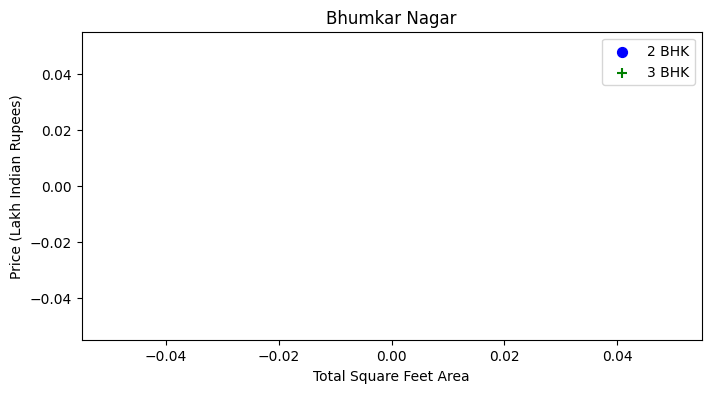

In [90]:
def plot_scatter_chart(df5,location):
    bhk2 = df5[(df5.location==location) & (df5.bhk==2)]
    bhk3 = df5[(df5.location==location) & (df5.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (8,4)
    plt.scatter(bhk2.carpet_area,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.carpet_area,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Bhumkar Nagar")

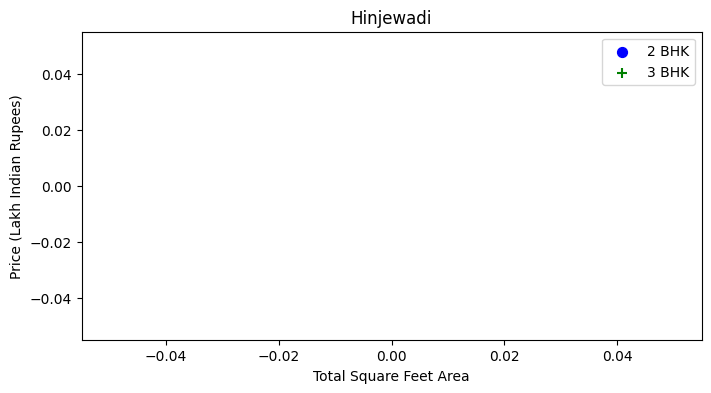

In [89]:
plot_scatter_chart(df7,"Hinjewadi")

In [95]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price),
                'std': np.std(bhk_df.price),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(5, 12)

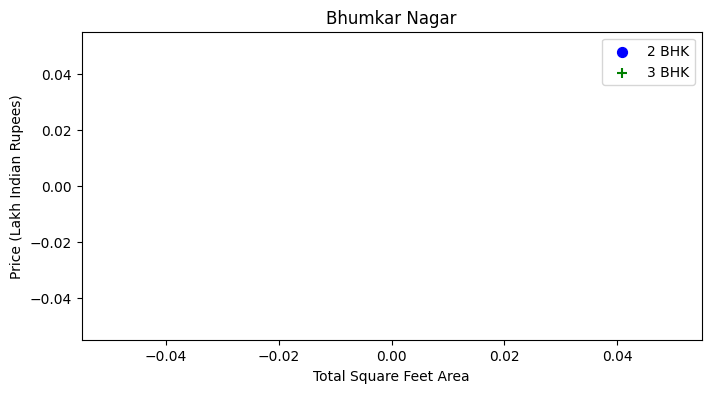

In [96]:
plot_scatter_chart(df8,"Bhumkar Nagar")

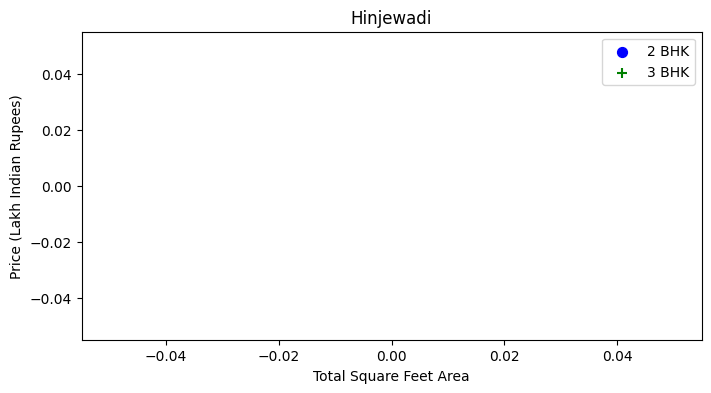

In [97]:
plot_scatter_chart(df8,"Hinjewadi")

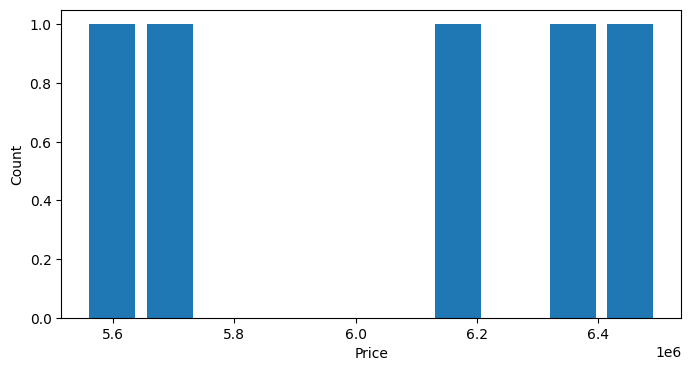

In [98]:
plt.hist(df8.price,rwidth=0.8)
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

# Outlier Removal Using total_floors Feature

In [110]:
df8.total_floors

0    12
1    12
2    11
3    11
4    14
Name: total_floors, dtype: int64

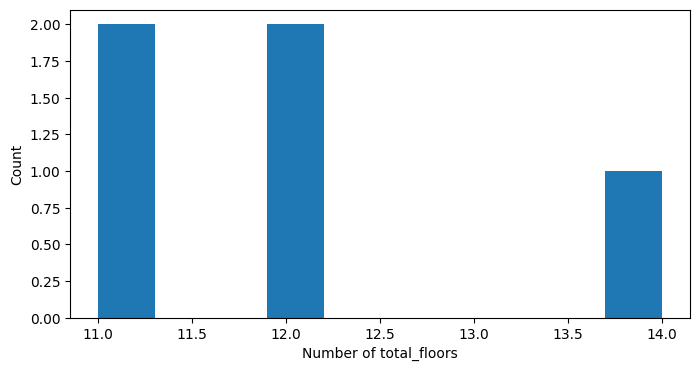

In [115]:
plt.hist(df8.total_floors,rwidth=8)
plt.xlabel("Number of total_floors")
plt.ylabel("Count")
plt.show()

In [116]:
df8[df8.total_floors>10]

,project,location,bhk,total_floors,carpet_area,super_area,price,rate,Linear_Regression,Random_Forest,Decision_Tree,Gradient_Boosting
0,5 Star Royal Entrada,Wakad,2,12,800.0,0,6500000,8125.000000,6062.893599,6587.658950,6569.112132,4123.087637
1,The Royal Mirage,Wakad,2,12,730.0,0,6199890,8493.000000,5792.511819,6625.170206,6569.112132,4870.961077
2,Yashada Splendid Radiance,Wakad,2,11,646.0,0,5724206,8861.000000,5698.607643,6631.956212,6569.112132,4787.693115
3,Rohan Prathama,other,2,11,620.0,0,5551480,8954.000000,6063.568673,5722.917749,5618.492443,4264.542797
4,Saarrthi Savvy Homes,other,2,14,712.0,0,6399675,8988.307584,6217.673335,5717.967549,5618.492443,3940.912986


In [117]:
df8[df8.total_floors>df8.bhk+2]

,project,location,bhk,total_floors,carpet_area,super_area,price,rate,Linear_Regression,Random_Forest,Decision_Tree,Gradient_Boosting
0,5 Star Royal Entrada,Wakad,2,12,800.0,0,6500000,8125.000000,6062.893599,6587.658950,6569.112132,4123.087637
1,The Royal Mirage,Wakad,2,12,730.0,0,6199890,8493.000000,5792.511819,6625.170206,6569.112132,4870.961077
2,Yashada Splendid Radiance,Wakad,2,11,646.0,0,5724206,8861.000000,5698.607643,6631.956212,6569.112132,4787.693115
3,Rohan Prathama,other,2,11,620.0,0,5551480,8954.000000,6063.568673,5722.917749,5618.492443,4264.542797
4,Saarrthi Savvy Homes,other,2,14,712.0,0,6399675,8988.307584,6217.673335,5717.967549,5618.492443,3940.912986


In [118]:
df9 = df8[df8.total_floors<df8.bhk+2]
df9.shape

(0, 12)

In [121]:
df9.head(1)

,project,location,bhk,total_floors,carpet_area,super_area,price,rate,Linear_Regression,Random_Forest,Decision_Tree,Gradient_Boosting


In [130]:
df10 = df8.drop(['Decision_Tree'],axis=1)

In [132]:
df10.head(3)

,project,location,bhk,total_floors,carpet_area,super_area,price,rate,Linear_Regression,Random_Forest,Gradient_Boosting
0,5 Star Royal Entrada,Wakad,2,12,800.0,0,6500000,8125.0,6062.893599,6587.658950,4123.087637
1,The Royal Mirage,Wakad,2,12,730.0,0,6199890,8493.0,5792.511819,6625.170206,4870.961077
2,Yashada Splendid Radiance,Wakad,2,11,646.0,0,5724206,8861.0,5698.607643,6631.956212,4787.693115


# Use One Hot Encoding For Location

In [133]:
dummies = pd.get_dummies(df10.location)

In [134]:
dummies.head(5)

,Wakad,other
0,True,False
1,True,False
2,True,False
3,False,True
4,False,True


In [135]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,project,location,bhk,total_floors,carpet_area,super_area,price,rate,Linear_Regression,Random_Forest,Gradient_Boosting,Wakad
0,5 Star Royal Entrada,Wakad,2,12,800.0,0,6500000,8125.000000,6062.893599,6587.658950,4123.087637,True
1,The Royal Mirage,Wakad,2,12,730.0,0,6199890,8493.000000,5792.511819,6625.170206,4870.961077,True
2,Yashada Splendid Radiance,Wakad,2,11,646.0,0,5724206,8861.000000,5698.607643,6631.956212,4787.693115,True
3,Rohan Prathama,other,2,11,620.0,0,5551480,8954.000000,6063.568673,5722.917749,4264.542797,False
4,Saarrthi Savvy Homes,other,2,14,712.0,0,6399675,8988.307584,6217.673335,5717.967549,3940.912986,False


In [136]:
df12 = df11.drop('location',axis='columns')
df12.head()

,project,bhk,total_floors,carpet_area,super_area,price,rate,Linear_Regression,Random_Forest,Gradient_Boosting,Wakad
0,5 Star Royal Entrada,2,12,800.0,0,6500000,8125.000000,6062.893599,6587.658950,4123.087637,True
1,The Royal Mirage,2,12,730.0,0,6199890,8493.000000,5792.511819,6625.170206,4870.961077,True
2,Yashada Splendid Radiance,2,11,646.0,0,5724206,8861.000000,5698.607643,6631.956212,4787.693115,True
3,Rohan Prathama,2,11,620.0,0,5551480,8954.000000,6063.568673,5722.917749,4264.542797,False
4,Saarrthi Savvy Homes,2,14,712.0,0,6399675,8988.307584,6217.673335,5717.967549,3940.912986,False


# Model Building

In [137]:
df12.shape

(5, 11)

In [171]:
z = df12.drop(['Linear_Regression'],axis=1)
z.head(3)

,project,bhk,total_floors,carpet_area,super_area,price,rate,Random_Forest,Gradient_Boosting,Wakad
0,5 Star Royal Entrada,2,12,800.0,0,6500000,8125.0,6587.658950,4123.087637,True
1,The Royal Mirage,2,12,730.0,0,6199890,8493.0,6625.170206,4870.961077,True
2,Yashada Splendid Radiance,2,11,646.0,0,5724206,8861.0,6631.956212,4787.693115,True


In [182]:
z1 = z.drop(['project'],axis=1)

In [183]:
z1.head(3)

,bhk,total_floors,carpet_area,super_area,price,rate,Random_Forest,Gradient_Boosting,Wakad
0,2,12,800.0,0,6500000,8125.0,6587.658950,4123.087637,True
1,2,12,730.0,0,6199890,8493.0,6625.170206,4870.961077,True
2,2,11,646.0,0,5724206,8861.0,6631.956212,4787.693115,True


In [184]:
X = z1.drop(['Wakad'],axis=1)
X.head(3)

,bhk,total_floors,carpet_area,super_area,price,rate,Random_Forest,Gradient_Boosting
0,2,12,800.0,0,6500000,8125.0,6587.658950,4123.087637
1,2,12,730.0,0,6199890,8493.0,6625.170206,4870.961077
2,2,11,646.0,0,5724206,8861.0,6631.956212,4787.693115


In [185]:
X.shape

(5, 8)

In [186]:
X.dtypes

bhk                    int64
total_floors           int64
carpet_area          float64
super_area             int64
price                  int64
rate                 float64
Random_Forest        float64
Gradient_Boosting    float64
dtype: object

In [187]:
y = df12.carpet_area
y.head(3)

0    800.0
1    730.0
2    646.0
Name: carpet_area, dtype: float64

In [188]:
y.dtype

dtype('float64')

In [189]:
len(y)

5

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [197]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

nan

# K Fold cross validation to measure accuracy of our LinearRegression model


In [201]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming you have your feature matrix X and target variable y

# Create a Linear Regression model
lr_model = LinearRegression()

# Specify the number of folds (e.g., 5)
num_folds = 5

# Create a KFold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=10)

# Perform K-fold cross-validation
cross_val_results = cross_val_score(lr_model, X, y, cv=kf, scoring='r2')

# Print the results
print("Cross-validated R^2 scores:", cross_val_results)


Cross-validated R^2 scores: [nan nan nan nan nan]
